# Maxwell Model - Varied Stress and Strain

The purpose of this code is to visualize the Maxwell Model when a time varying stress is applied. The graph created models the strain values over time. This code is for anyone with a bit of knowledge on viscoelasticity, and looking to see the relative phase of stress and strain depening on frequency. 

The **Maxwell Model** consists of a linear spring and a dashpot. When an applied stress, *sigma0* (to signify stress at time = 0) is applied to the viscoelastic material sample, the spring immediately extends and the piston moves through the viscous fluid in the dashpot. The purpose of this model is to demonstrate that if a material is put under a constant strain, the stresses gradually relaxes. Additionally, it is meant to show that when a material is put under constant stress, the strain has two components. One component is the elastic component that corresponds to the spring and relaxes immediately after stress release. The second component is viscous component that grows with time as long as stress is applied. 

For our purposes, we will not be applying a constant value for stress but rather function for the amount of stress at each time. In other words, we will be seeing how a time varying stress affects the strain over a set period of time. 

## Getting Strain Equation as a Function of After Applying Stress as a Function of Time

We start by importing the necessary packages to get the equation we wish to plot. This equation is for a strain function when the time varying stress function is applied to it and based on the original Maxwell model. 

In [44]:
import numpy as np
import sympy as sp
sp.init_session()

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



Next, we create several variables that are used in the Maxwell Model and save them as integers, and specify that *epsilon* (or strain) and *sigma* (or stress) are functions of time. Additionally, we restrict *omega* as a positive value for ease of calculation. 

In [36]:
t, M, eta, epsilon0, sigma0, C1, C2 = sp.var('t, M, eta, epsilon0, sigma0, C1, C2', integer = True)
omega = sp.var('omega', positive = True)
epsilon, sigma = sp.var('epsilon, sigma', cls=Function)

Next, we define the Maxwell Model as the following equation using *sp.Eq.*

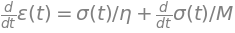

In [24]:
maxwellModel = sp.Eq(epsilon(t).diff(t), sigma(t).diff(t)/M + sigma(t)/eta)
maxwellModel

After this, we can solve for *epsilon(t)* by using *dsolve.*

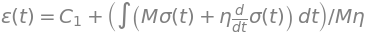

In [45]:
straineq = dsolve(maxwellModel,epsilon(t))
straineq

The stress function we are using in this problem is: 

$\sigma(t)$ = $\sigma0$ * $\sin$($\omega*t)$

 We can substitute that function in for *sigma(t)* using *.subs()* and calculate the integral using *doit.* 

In [46]:
stressfunc = sigma0*sp.sin(omega*t)
gensoln = straineq.subs(sigma(t),stressfunc).doit()
gensoln

We see now that we have a constant, *C1.* To solve for that constant, let's plug in *t = 0* using *.subs()* and using *.rhs* to only give us the quantity on the right hand side of the equal sign. Although it is not written, it is by default equal to 0. Therefore, we can say that: 

C1 = $\sigma0$/$\eta$*$\omega$

In [48]:
gensoln.rhs.subs(t,0)

Now that we know what C1 is equal to, we can plug that into the equation using *.subs().*

In [28]:
gensoln = gensoln.subs(C1, sigma0/(eta*omega))
gensoln

## Plotting Strain Under Specific Conditions

Now, we can start seeing that the graph of strain over time! Let's start by using **100 as the initial stress** applied. We can subsitute it into the equation using *.subs().*

In [29]:
gensoln = gensoln.subs(sigma0,100)
gensoln

Next, we can get the right hand side of the equal sign to isolate our equation for strain to plot. 

In [30]:
solutionToPlot = gensoln.rhs
solutionToPlot

Following this, we import several packages to construct an interactive plot, were one can change the M, eta, and omega values! We will define a function, *pltsoln,* with those parameters. Within the function, we set *t* as a symbol, *x* as the equation that we want to plot based on our calculation above, and put those variables into the *lambdify* function. This allows for the conversion of a sympy function to a lambda function to do numerical calculations. 

We then set *x_vals* as our time values that we want to graph over. We are graphing from 0 to 2 with 50 total numbers inbetween. Next, *y_vals* gives our function values by plugging in the *x_vals* time components for *t* in the lambdigy function (which is saved to the variabe *lam_x.* Then, we use *mpl.plot* to plot *y_vals* against *x_vals* or the strain vs time. 

Finally, we call the function *pltsoln,* as a parameter of *interact* to allow for rapid, easy changes in the *M, eta* and *omega* values and instant plotting! We can see as we adjust those values, that a new plot is created on top of the original to compare how the strain changes! 

In [49]:
from sympy import symbols
from numpy import linspace
from sympy import lambdify
import matplotlib.pyplot as mpl

from ipywidgets import *

def pltsoln(M,eta,omega):
    t = symbols('t')
    x = (100/(eta*omega))+ (-(100*M*sp.cos(omega*t)) + 100*eta*sp.sin(omega*t))/(eta*M)
    lam_x = lambdify(t, x, modules=['numpy'])

    x_vals = linspace(0, 2, 50)
    y_vals = lam_x(x_vals)
    mpl.plot(x_vals, y_vals)

In [50]:
interact(pltsoln, M=(1,100,1),eta=(1,100,1),omega=(1,100,1))

interactive(children=(IntSlider(value=50, description='M', min=1), IntSlider(value=50, description='eta', min=…

<function __main__.pltsoln(M, eta, omega)>

## Resources
* https://www.sciencedirect.com/topics/engineering/maxwell-model
* https://stackoverflow.com/questions/35390187/using-sympy-equations-for-plotting
* https://en.wikipedia.org/wiki/Viscoelasticity